### 10.1 ###

设有两个三维样本向量：

$$x^\left( 1 \right) = (2,2,0)$$
$$x^\left( 2 \right) = (0,2,2)$$

试用主成分分析法将它们降至二维。

In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.d = n_components
        
    def fit_transform(self, X):
        self.mean = X.mean(axis = 0)
        X = X - self.mean
        eigen_values, eigen_vectors = np.linalg.eig(X.T.dot(X)) 
        n = len(eigen_values)
        pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(n)]
        pairs = sorted(pairs, key = lambda pair: pair[0], reverse = True)
        self.W = np.array([pairs[i][1] for i in range(self.d)]).T
        return X.dot(self.W)  
    
    def inverse_transform(self, Z):
        return Z.dot(self.W.T) + self.mean
X = np.array([[2,2,0],[0,2,2]])
model = PCA(2)
model.fit_transform(X)

array([[ 1.41421356e+00, -2.22044605e-16],
       [-1.41421356e+00,  2.22044605e-16]])

### 10.2###

设有两个三维样本向量：

$$x^\left( 1 \right) = (2,2,0)$$
$$x^\left( 2 \right) = (0,2,2)$$

试用多维缩放法将它们降至二维。


In [2]:
import numpy as np

class MDS:
    def __init__(self, n_components):
        self.d = n_components
        
    def fit_transform(self, X):
        m, n = X.shape
        self.mean = X.mean(axis = 0)
        X = X - self.mean
        B = X.dot(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(B) 
        pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(m)]
        pairs = sorted(pairs, key = lambda pair: pair[0], reverse = True)
        Z = np.array([np.sqrt(pairs[i][0]) * pairs[i][1] for i in range(self.d)]).T
        return Z
X = np.array([[2,2,0],[0,2,2]])
model = MDS(2)
model.fit_transform(X)

array([[ 1.41421356e+00,  1.49011612e-08],
       [-1.41421356e+00,  1.49011612e-08]])

### 10.3 考察如下带标签的降维问题：###

$$x^\left( 1 \right) = (1,1,0),y^\left( 1 \right) = 0$$
$$x^\left( 2 \right) = (0,1,1),y^\left( 2 \right) = 0$$
$$x^\left( 3 \right) = (1,0,1),y^\left( 3
\right) = 1$$
$$x^\left( 4 \right) = (0,1,0),y^\left( 4 \right) = 1$$


试用线性判别分析法将上述数据降至二维。

In [3]:
import numpy as np

class LDA:
    def __init__(self, n_components):
        self.d = n_components
        
    def fit_transform(self, X, y):
        sums = dict()
        counts = dict()
        m,n = X.shape  
        for t in range(m):
            i = y[t]
            if i not in sums:
                sums[i] = np.zeros((2,n))
                counts[i] = 0
            sums[i] += X[t].reshape(1,n)
            counts[i] += 1
        X_mean = np.mean(X, axis=0).reshape(1,n)
        S_b = np.zeros((n,n))
        for i in counts:
            v = X_mean - 1.0 * sums[i] / counts[i] 
            S_b += counts[i] * v.T.dot(v)
        S_w = np.zeros((n,n))
        for t in range(m):
            i = y[t]
            u = X[t].reshape(1,n) - 1.0 * sums[i] / counts[i]
            S_w += u.T.dot(u)
        A = np.linalg.pinv(S_w).dot(S_b)
        values, vectors = np.linalg.eig(A) 
        pairs = [(values[j], vectors[:,j]) for j in range(len(values))]
        pairs = sorted(pairs, key = lambda pair: pair[0], reverse = True)
        W = np.array([pairs[j][1] for j in range(self.d)]).T
        return X.dot(W) 
X = np.array([[1,1,0], [0,1,1], [1,0,1], [0,1,0]])
y = np.array([0, 0, 1, 1])
model = LDA(2)
model.fit_transform(X,y)

array([[-2.22044605e-16,  1.00000000e+00],
       [ 4.44089210e-16,  0.00000000e+00],
       [-1.15470054e+00,  1.00000000e+00],
       [ 5.77350269e-01,  0.00000000e+00]])

### 10.4 鸢尾花数据降维。###

高尾花数据集中的每一条数据都含有4个特征: 花瓣长、花瓣宽、花尊长、花尊宽。
每条数据有一个取值属于{0,1,2}的标签，表示鸢尾花的种属。

基于图10.29中的程序,分别用主成分分析法、主成分分析的核方法以及线性判别分机
法将数据降至二维，并比较这8个算法的降维效果。

图10.29  获取鸢尾花数据

Text(0.5,1,'LDA')

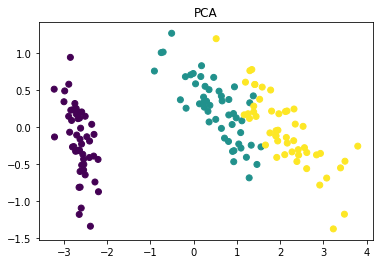

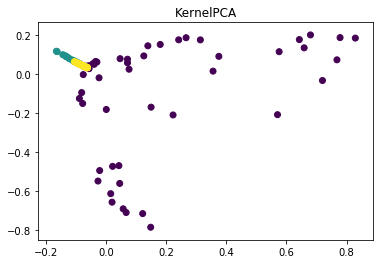

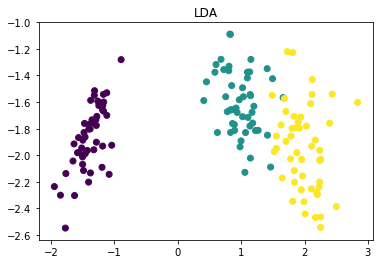

In [5]:
%matplotlib inline
import numpy as np

def default_kernel(x1, x2):
    return x1.dot(x2.T)

def rbf_kernel(x1, x2):
    sigma = 1.0 / 15
    return np.exp(-np.linalg.norm(x1-x2, 2) ** 2 / sigma)

class KernelPCA:    
    def __init__(self, n_components, kernel = None):
        self.d = n_components
        self.kernel = default_kernel
        if kernel != None:
            self.kernel = kernel
        
    def fit_transform(self, X):
        m,n = X.shape
        K = np.zeros((m,m))
        for s in range(m):
            for r in range(m):
                K[s][r] = self.kernel(X[s],X[r])
        J = np.ones((m,m)) * (1.0 / m)
        K = K - J.dot(K) -K.dot(J) + J.dot(K).dot(J)
        eigen_values, eigen_vectors = np.linalg.eig(K) 
        pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(m)]
        pairs = sorted(pairs, key = lambda pair: pair[0], reverse = True)
        Z = np.array([pairs[i][1] * np.sqrt(pairs[i][0]) for i in range(self.d)]).T
        return Z  

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

model = PCA(2)
X_pca = model.fit_transform(X)

model = KernelPCA(2, rbf_kernel)
X_kpca = model.fit_transform(X)

model = LDA(2)
X_lda = model.fit_transform(X,y)

import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(X_pca[:,0], X_pca[:,1], c = y)
plt.title('PCA')
plt.figure(2)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c = y)
plt.title('KernelPCA')
plt.figure(3)
plt.scatter(X_lda[:,0], X_lda[:,1], c = y)
plt.title('LDA')

### 10.5 同心圆数据降维。 ###

Sklearn 数据库中提供了同心圆数据集。在同心圆数据集合中，每个数据都是一个二维向量，表示平面上的一个点。数据集中一共含有两类数据，一类数据的分布形成平面上的一个大圆，另一类数据的分布形式形成平面上的一个小圆。图10.30是同心圆数据集的一组数据采样的例子。

图10.31中的程序生成一组同心圆数据采样。第二行生成的特征X和标签y。其中，y的值为0的数据属于大圆，y的值为1的数据属于小圆。

基于图10.31中的程序，分别用主成分分析法、主成分分析的核方法以及线性判别分析
法将数据降至一维，并比较这3个算法的降维效果。

    图10.30 同心圆数据集采样
![jupyter](10.30.png)

     
     
     图10.31 生成同心圆数据采样


/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5,1,'LDA')

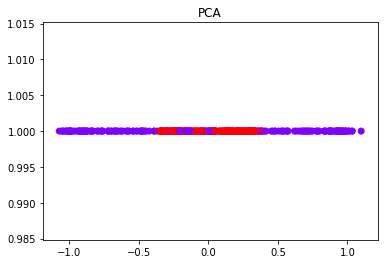

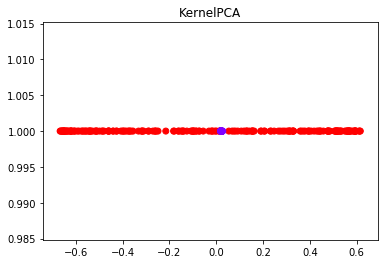

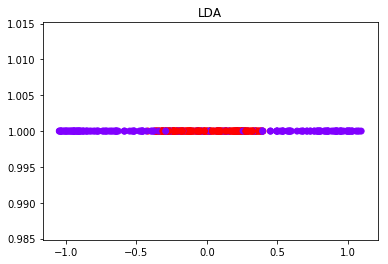

In [6]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
model = PCA(1)
X_pca = model.fit_transform(X).reshape(-1)

model = KernelPCA(1, rbf_kernel)
X_kpca = model.fit_transform(X).reshape(-1)

model = LDA(1)
X_lda = model.fit_transform(X,y).reshape(-1)

plt.figure(1)
plt.scatter(X_pca, np.ones(X_pca.shape), c=y, cmap='rainbow')
plt.title('PCA')
plt.figure(2)
plt.scatter(X_kpca, np.ones(X_kpca.shape), c=y, cmap='rainbow')
plt.title('KernelPCA')
plt.figure(3)
plt.scatter(X_lda, np.ones(X_lda.shape), c=y, cmap='rainbow')
plt.title("LDA")

### 10.6S形流形降维。###

在Sklearn工具库中集成了S形流形数据集。该数据集中的每条数据都是三维空间中
的一个点,并且带有颜色。数据的分布呈S形。图10.32是S形流形数据集的一组数据
采样。

    图10.32 S形数据集采样
![jupyter](10.32.png)


图10.33中的程序生成S形数据采样。基于图10. 33中的程序,分别用局部线性嵌人
多维缩放法将数据降至二维，并比较两种算法的降维效果。


    图10.33 生成S形流形数据的程序

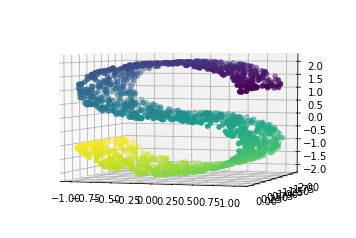

/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5,1,'MDS')

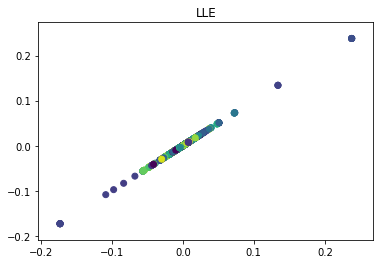

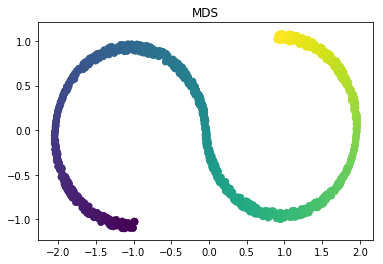

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, color = datasets.samples_generator.make_s_curve(n_samples=1500)
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color)
ax.view_init(4, -72)
plt.show()

import numpy as np
from sklearn.neighbors import NearestNeighbors

class LLE:
    def __init__(self, n_components, n_neighbors):
        self.d = n_components
        self.k = n_neighbors
    
    def get_weights(self, X, knn):
        m, n = X.shape
        W = np.zeros((m,m))
        for i in range(m):
            U = X[knn[i]].reshape(-1,n)
            k = len(U)
            for t in range(k):
                U[t] -= X[i]
            C = U.dot(U.T)
            w = np.linalg.inv(C).dot(np.ones((k,1)))
            w /= w.sum(axis=0)
            for t in range(k):
                W[i][knn[i][t]] = w[t]
        return W
        
    def fit_transform(self,X):
        m, n = X.shape
        model = NearestNeighbors(n_neighbors=self.k+1).fit(X)
        knn = model.kneighbors(X, return_distance = False)[:,1:]
        W = self.get_weights(X, knn)
        M = (np.identity(m) - W).T.dot(np.identity(m) - W)
        eigen_values, eigen_vectors = np.linalg.eig(M) 
        pairs = [(eigen_values[i], eigen_vectors[:,i]) for i in range(m)]
        pairs = sorted(pairs, key = lambda pair: pair[0])
        Z = np.array([pairs[i+1][1] for i in range(self.d)]).T
        return Z


lle = LLE(n_components = 2, n_neighbors=2)
X_lle = lle.fit_transform(X)
mds = MDS(2)
X_mds = mds.fit_transform(X)

plt.figure(1)
plt.scatter(X_lle[:,0], X_lle[:,1], c = color)
plt.title('LLE')
plt.figure(2)
plt.scatter(X_mds[:,0], X_mds[:,1], c = color)
plt.title('MDS')

### 10.7 Yale 人脸数据降维。###

Yale人脸数据集0是一个常用的测试人脸识别算法的数据集。该数据集中含有来自15
个人的165张照片。数据集中的每个人都有11张照片。照片分别有如下主题:正面光明
左面光照、右面光照、戴眼镜、不戴眼镜、正常、快乐、悲伤、疲倦、惊讶、眨眼。图10.34是
Yale人脸数据集的一组数据采样。

    图10.34 Yale人脸数据集采样
![jupyter](10.34.png)


将Yale人脸数据集下载至当前目录后，可用图10. 35中的程序读人数据集中的图片，第11行的images为图片的像素灰度矩阵。第12行的labels为人物编号。第13行日subjects为照片的主题。

(1)基于图10. 35中的程序,用自动编码器算法对Yale人脸图片进行降维。

(2)将数据降至二维，并将降维的结果可视化。要求不同主题的图片对应的点采用不
同的颜色。

    10.35 读取Yale人脸数据集的程序


Bad key "text.kerning_factor" on line 4 in
D:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


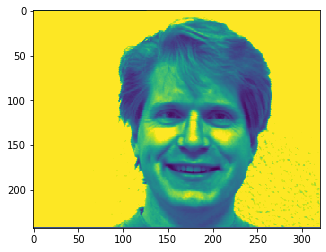

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 77760)]           0         
_________________________________________________________________
dense (Dense)                (None, 500)               38880500  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1002      
_________________________________________________________________
dense_2 (Dense)              (None, 77760)             233280    
Total params: 39,114,782
Trainable params: 39,114,782
Non-trainable params: 0
_________________________________________________________________
None
Train on 130 samples, validate on 33 samples
Epoch 1/20
130/130 [==============================] - 2s 16ms/sample - loss: 0.6056 - val_loss: 0.4643
Epoch 2/20
130/130 [==============================] - 1s 7ms/sample - loss: 0.4335 - val_loss:

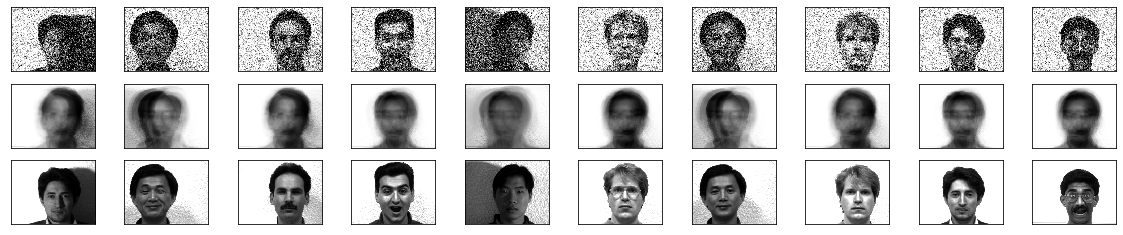

In [1]:
%matplotlib inline
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

def read_face_images(data_folder):
    image_paths = [os.path.join(data_folder, item) for item in os.listdir(data_folder)]
    images = []
    labels = []
    subjects = []
    for image_path in image_paths:
        im = io.imread(image_path,as_gray=True)
        images.append(np.array(im, dtype='uint8'))
        labels.append(int(os.path.split(image_path)[1].split(".")[0].replace("subject", "")))
        subjects.append(os.path.split(image_path)[1].split(".")[1])
    return np.array(images), np.array(labels), np.array(subjects)

data_folder = "./yalefaces"
images, labels, subjects = read_face_images(data_folder)

plt.imshow(images[1])
plt.show()

x_train, x_test, _, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
#add random noise
x_train_nosiy = x_train + 0.3 * np.random.normal(loc=0., scale=1., size=x_train.shape)
x_test_nosiy = x_test + 0.3 * np.random.normal(loc=0, scale=1, size=x_test.shape)
x_train_nosiy = np.clip(x_train_nosiy, 0., 1.)
x_test_nosiy = np.clip(x_test_nosiy, 0, 1.)
#build autoencoder model

input_img = Input(shape=(77760,))
encoded = Dense(500, activation='relu')(input_img)
encoder_output = Dense(2)(encoded)
decoded = Dense(77760, activation='sigmoid')(encoder_output)

autoencoder = Model(inputs=input_img, outputs=decoded)
encoder = Model(inputs=input_img, outputs=encoder_output)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#'mse'
print(autoencoder.summary())
autoencoder.fit(x_train_nosiy, x_train, epochs=20, batch_size=10, verbose=1, validation_data=(x_test, x_test))

#decoded test images
decoded_img = autoencoder.predict(x_test_nosiy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #noisy data
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_nosiy[i].reshape(243, 320))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #predict
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(243, 320))
    plt.gray()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    #original
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(x_test[i].reshape(243, 320))
    plt.gray()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()

In [18]:
subjects[subjects == 'glasses']=1
subjects[subjects == 'happy']=2
subjects[subjects == 'leftlight']=3
subjects[subjects == 'noglasses']=4
subjects[subjects == 'normal']=5
subjects[subjects == 'rightlight']=6
subjects[subjects == 'sad']=7
subjects[subjects == 'sleepy']=8
subjects[subjects == 'surprised']=9
subjects[subjects == 'wink']=10
subjects[subjects == 'centerlight']=11
subjects = subjects.astype(np.int)
subjects

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  8,  9, 10,
       11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

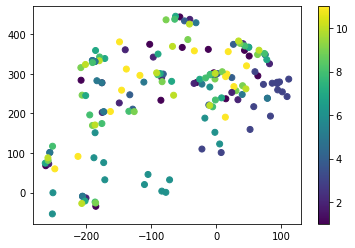

In [20]:
X = images.astype('float32')/255.0
X = X.reshape(X.shape[0], -1)
encoded_imgs = encoder.predict(X)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=subjects)
plt.colorbar()
plt.show()

### 10.8主成分分析法与自动编码器算法###

主成分分析法的指导思想是最大化投影方差,而自动编码器算法的指导思想是最小化
还原误差。尽管看似不同，实际上，这两个指导思想所产生的算法殊途同归。以下分步证
明:不含有隐藏层的自动编码器算法就是主成分分析法。

给的 m 个 n 维向量$$x^{\left( 1 \right)},x^{\left( 2 \right)},x^{\left( 3 \right)},...,x^{\left( m \right)}$$

要求它们降至 d 维。不含隐藏层的自动编码器算法的任务是计算 n×d 矩阵 W 以及 d×n 矩阵U，使得

$$\sum_{i=1}^{m}|| x^{\left( i \right)} - U^TW^T x^{\left( i \right)} || ^2  \tag{10.64}$$

最小化。

(1)证明:如果W和U使式(10.64)最小化，则必然有$U=W^T$且$W^TW=I$。由此可知
优化式(10. 64)等价于以下带约束的优化问题:

$$min\sum_{i=1}^{m}||x^{\left( i \right)} - WW^Tx^{\left( i \right)}||^2$$

$$约束： W^TW = I \tag{10.65}$$


(2)定义

 $$ X = \left[\begin{matrix}x^{\left( 1 \right)T}  \cr x^{\left( 2 \right)T} \cr x^{\left( 3 \right)T} \cr ... \cr x^{\left( m \right)T}\end{matrix}\right]$$ 
 
 
 证明：
 式（10.65）中的优化问题等价于
  $$ max \; Tr(W^TX^TXW)$$
 $$约束：W^TW = I  \tag{10.66}$$   
 
 其中，Tr(∙)是方阵的迹函数。
 
 (3) 设 $$\lambda_1 ,\lambda_2 ,\lambda_3,..., \lambda_d$$是$X^TX$的最大的d个特征根，且$$w^{\left( 1 \right)},w^{\left( 2 \right)},w^{\left( 3 \right)},...,w^{\left( d \right)}$$ 是其相印的相互正交的单位特征向量。
 
 证明：
 
$$W =(w^{\left( 1 \right)},w^{\left( 2 \right)},w^{\left( 3 \right)},...,w^{\left( d \right)}) $$
是式（10.66）的最优解。
  
 
由以上步骤就证明了不含有隐藏层的自动编码器算法就是主成分分析法。

(1)  
对式(10.64)分别对$U和W$求导可得
$$
-2(x^{(i)}-U^TW^Tx^{(i)})(x^{(i)T}U^T)=0\\
-2(x^{(i)}-U^TW^Tx^{(i)})(x^{(i)T}W)=0\\
$$
所以
$$
U^T=W\\
U=W^T
$$
由于
$$
W^TW=I
$$
则优化式(10. 64)等价于以下带约束的优化问题:
$$
min\sum_{i=1}^{m}||x^{\left( i \right)} - WW^Tx^{\left( i \right)}||^2\\
约束： W^TW = I
$$